# Chapter 7 - English text preprocessing basics

2022 January 19

<a target="_blank" href="https://colab.research.google.com/github/EastBayEv/SSDS-TAML/blob/main/fall2022/6_English_text_preprocessing_basics.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![text](img/text.png)

Unstructured text - text you find in the wild in books and websites - is generally not amenable to analysis. Before it can be analyzed, the text needs to be standardized to a format so that Python can recognize each unit of meaning (called a "token") as unique, no matter how many times it occurs and how it is stylized. 

Although not an exhaustive list, some key steps in preprocessing text include:  
* Standardizing text casing and spacing 
* Remove punctuation and special characters/symbols
* Remove stop words
* Stem or lemmatize: convert all non-base words to their base form 

Stemming/lemmatization and stop words (and some punctuation) are language-specific. NLTK works for English out-of-the-box, but you'll need different code to work with other languages. Some languages (e.g. Chinese) also require *segmentation*: artificially inserting spaces between words. If you want to do text pre-processing for other languages, please let us know and we can help!

In [66]:
# ensure you have the proper nltk modules
import nltk
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('omw-1.4')

[nltk_data] Downloading package words to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from string import punctuation
import pandas as pd
import seaborn as sns
from collections import Counter
import regex as re

import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import spacy
import nltk
from nltk.corpus import movie_reviews
import numpy as np
from sklearn.utils import shuffle
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix 

import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [68]:
text = open("data/dracula.txt").read()

# print just the first 100 characters
print(text[:100])

The Project Gutenberg eBook of Dracula, by Bram Stoker

This eBook is for the use of anyone anywhere


## Standardize Text 

### Casing and spacing

Oftentimes in text analysis, identifying occurences of key word(s) is a necessary step. To do so, we may want "apple," "ApPLe," and "apple      " to be treated the same; i.e., as an occurence of the token, 'apple.' To achieve this, we can standardize text casing and spacing: 

In [14]:
# Converting all charazcters in a string to lowercase only requires one method: 
message = "Hello! Welcome      to        TAML!"
print(message.lower())

# To replace instances of multiple spaces with one, we can use the regex module's 'sub' function:
# Documentation on regex can be found at: https://docs.python.org/3/library/re.html
single_spaces_msg = re.sub('\s+', ' ', message)
print(single_spaces_msg)

hello! welcome      to        taml!
Hello! Welcome to TAML!


### Remove punctuation

Remember that Python methods can be chained together. 

Below, a standard for loop loops through the `punctuation` module to replace any of these characters with nothing.

In [15]:
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
for char in punctuation:
    text = text.lower().replace(char, "")

In [17]:
print(text[:100])

 sequoioideae popularly known as redwoods is a subfamily of coniferous trees within the family cupre


### Tokenize the text

Split each word on spaces.

In [18]:
# .split() returns a list of the tokens in a string, separated by the specified delimiter (default: " ")
tokens = text.split()

In [19]:
print(tokens[:20])

['sequoioideae', 'popularly', 'known', 'as', 'redwoods', 'is', 'a', 'subfamily', 'of', 'coniferous', 'trees', 'within', 'the', 'family', 'cupressaceae', 'it', 'includes', 'the', 'largest', 'and']


### Remove stop words



Below is a list comprehension (a sort of shortcut for loop) that can accomplish this task for us.

In [20]:
filtered_text = [word for word in tokens if word not in stopwords.words('english')]

In [77]:
# show only the first 100 words
# do you see any stopwords?
print(filtered_text[:100])

['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'reuse', 'terms', 'project', 'gutenberg', 'license', 'included', 'ebook', 'online', 'wwwgutenbergorg', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'dracula', 'author', 'bram', 'stoker', 'release', 'date', 'october', '1995', 'ebook', '345', 'recently', 'updated', 'march', '12', '2021', 'language', 'english', 'character', 'set', 'encoding', 'utf8', 'produced', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'start', 'project', 'gutenberg', 'ebook', 'dracula', 'dracula', 'dracula', 'bram', 'stoker', 'illustration', 'colophon', 'new', 'york', 'grosset', 'dunlap', 'publishers', 'copyright', '1897', 'united', 'states', 'america', 'according', 'act', 'congress', 'bram', 'stoker', 'rights', 'reserved', 'print

### Lemmatizing/Stemming tokens

Lemmatizating and stemming are related, but are different practices. Both aim to reduce the inflectional forms of a token to a common base/root. However, how they go about doing so is the key differentiating factor.  

Stemming operates by removes the prefixs and/or suffixes of a word. Examples include: 
* flooding to flood 
* studies to studi
* risky to risk 

Lemmatization attempts to contextualize a word, arriving at it's base meaning. Lemmatization reductions can occur across various dimensions of speech. Examples include: 
* Plural to singular (corpora to corpus)
* Condition (better to good)
* Gerund (running to run)

One technique is not strictly better than the other - it's a matter of project needs and proper application. 

In [78]:
stmer = nltk.PorterStemmer()

lmtzr = nltk.WordNetLemmatizer()

In [79]:
# do you see any differences?
token_stem  = [ stmer.stem(token) for token in filtered_text]

token_lemma = [ lmtzr.lemmatize(token) for token in filtered_text ]

print(token_stem[:10])

print(token_lemma[:10])

['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyon', 'anywher']
['project', 'gutenberg', 'ebook', 'dracula', 'bram', 'stoker', 'ebook', 'use', 'anyone', 'anywhere']


## Part of speech tags

Part of speech tags are labels given to each word in a text such as verbs, adverbs, nouns, pronouns, adjectives, conjunctions, and their various derivations and subcategories. 

In [21]:
tagged = nltk.pos_tag(token_lemma)

# Let's see a quick example: 
ex_string = 'They refuse to permit us to obtain the refuse permit.'
print(nltk.pos_tag(ex_string.split())) 

NameError: name 'token_lemma' is not defined

The output of .pos_tag is a list of tuples (pairs), where the first element is a text token and the second is a part of speech. Note that, in our example string, the token 'refuse' shows up twice - once as a verb, and once as a noun. In the output to .pos_tag, the first tuple with 'refuse' has the 'VBP' tag (present tense verb) and the second tuple has the 'NN' tag (noun). Nifty!

In [81]:
chunked = nltk.chunk.ne_chunk(tagged)

## Convert to dataframe

In [82]:
df = pd.DataFrame(chunked, columns=['word', 'pos'])

In [83]:
df.head(n = 10)

,word,pos
0,project,NN
1,gutenberg,NN
2,ebook,NN
3,dracula,NN
4,bram,NN
5,stoker,NN
6,ebook,NN
7,use,NN
8,anyone,NN
9,anywhere,RB


In [84]:
df.shape

(73556, 2)

## Visualize the 20 most frequent words

In [85]:
top = df.copy()

count_words = Counter(top['word'])
count_words.most_common()[:20]

[('said', 569),
 ('one', 509),
 ('could', 493),
 ('u', 463),
 ('must', 451),
 ('would', 428),
 ('shall', 427),
 ('time', 425),
 ('know', 420),
 ('may', 416),
 ('see', 398),
 ('come', 377),
 ('van', 322),
 ('hand', 310),
 ('came', 307),
 ('helsing', 300),
 ('went', 298),
 ('lucy', 296),
 ('go', 296),
 ('like', 278)]

In [86]:
words_df = pd.DataFrame(count_words.items(), columns=['word', 'count']).sort_values(by = 'count', ascending=False)

In [87]:
words_df[:20]

,word,count
209,said,569
256,one,509
155,could,493
180,u,463
319,must,451
162,would,428
278,shall,427
165,time,425
224,know,420
17,may,416


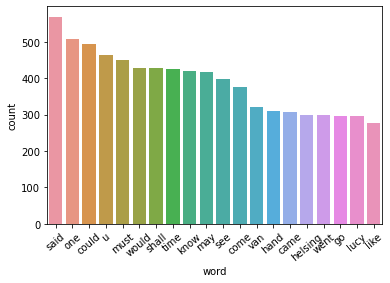

In [88]:
# What would you need to do to improve an approach to word visualization such as this one?
top_plot = sns.barplot(x = 'word', y = 'count', data = words_df[:20])
top_plot.set_xticklabels(top_plot.get_xticklabels(),rotation = 40);

## Corpus definition: United Nations Human Rights Council Documentation

![unhrc](img/unhrc.jpg)

We will select eleven .txt files from the UN HRC as our corpus, stored within the subfolder "human_rights" folder inside the main "data" directory. 

These documents contain information about human rights recommendations made by member nations towards countries deemed to be in violation of the HRC. 

[Learn more about the UN HRC by clicking here.](https://www.ohchr.org/en/hrbodies/hrc/pages/home.aspx)

### Define the corpus directory

Set the directory's file path and print the files it contains.

In [23]:
import os
corpus = os.listdir('data/human_rights/')

# View the contents of this directory
corpus

['sanmarino2014.txt',
 'tuvalu2013.txt',
 'kazakhstan2014.txt',
 'cotedivoire2014.txt',
 'fiji2014.txt',
 'bangladesh2013.txt',
 'turkmenistan2013.txt',
 'jordan2013.txt',
 'monaco2013.txt',
 'afghanistan2014.txt',
 'djibouti2013.txt']

### Store these documents in a data frame

In [24]:
# Store in an empty dictionary for conversion to data frame
empty_dictionary = {}

# Loop through the folder of documents to open and read each one
for document in corpus:
    with open('data/human_rights/' + document, 'r', encoding = 'utf-8') as to_open:
         empty_dictionary[document] = to_open.read()

# Populate the data frame with two columns: file name and document text
human_rights = (pd.DataFrame.from_dict(empty_dictionary, 
                                       orient = 'index')
                .reset_index().rename(index = str, 
                                      columns = {'index': 'file_name', 0: 'document_text'}))

### View the data frame

In [25]:
human_rights

,file_name,document_text
0,sanmarino2014.txt,\n United Nations \n A/HRC/28/9 \n \n \n\n Ge...
1,tuvalu2013.txt,\n United Nations \n A/HRC/24/8 \n \n \n\n G...
2,kazakhstan2014.txt,\n United Nations \n A/HRC/28/10 \n \n \n\n G...
3,cotedivoire2014.txt,\nDistr.: General 7 July 2014 English Original...
4,fiji2014.txt,\n United Nations \n A/HRC/28/8 \n \n \n\n Ge...
5,bangladesh2013.txt,\n United Nations \n A/HRC/24/12 \n \n \n\n ...
6,turkmenistan2013.txt,\n United Nations \n A/HRC/24/3 \n \n \n\n G...
7,jordan2013.txt,\nDistr.: General 6 January 2014 \nOriginal: E...
8,monaco2013.txt,\nDistr.: General 3 January 2014 English Origi...
9,afghanistan2014.txt,\nDistr.: General 4 April 2014 \nOriginal: Eng...


### View the text of the first document

In [26]:
# first thousand characters
print(human_rights['document_text'][0][:1000])

 
 United Nations 
 A/HRC/28/9 
 
 

 General Assembly 
 Distr.: General 
24 December 2014 
 
Original: English 
 

Human Rights Council 

Twenty-eighth session 
Agenda item 6 
Universal Periodic Review 
  Report of the Working Group on the Universal Periodic Review* 
 * The annex to the present report is circulated as received. 
  San Marino 
Contents 
 Paragraphs Page 
  Introduction .............................................................................................................  1Ð4 3 
 I. Summary of the proceedings of the review process ................................................  5Ð77 3 
  A. Presentation by the State under review ...........................................................  5Ð23 3 
  B. Interactive dialogue and responses by the State under review ........................  24Ð77 6 
 II. Conclusions and/or recommendations .....................................................................  78Ð81 13 
 Annex 
  Composition of the delegation .......

## English text preprocessing

Create a new column named "clean_text" to store the text as it is preprocessed. 

### What are some of the things we can do? 

How else could you improve this process? 

* Remove non-alphanumeric characters/punctuation
* Remove digits
* Remove [unicode characters](https://en.wikipedia.org/wiki/List_of_Unicode_characters)
* Remove extra spaces
* Convert to lowercase
* Lemmatize (optional for now)

Take a look at the first document after each step to see if you can notice what changed. 

> Remember: the process will likely be different for many other natural languages, which frequently require special considerations. 

### Remove non-alphanumeric characters/punctuation

In [27]:
human_rights['clean_text'] = human_rights['document_text'].str.replace(r'[^\w\s]', ' ', regex = True)

In [28]:
print(human_rights['clean_text'][0][:1000])

 
 United Nations 
 A HRC 28 9 
 
 

 General Assembly 
 Distr   General 
24 December 2014 
 
Original  English 
 

Human Rights Council 

Twenty eighth session 
Agenda item 6 
Universal Periodic Review 
  Report of the Working Group on the Universal Periodic Review  
   The annex to the present report is circulated as received  
  San Marino 
Contents 
 Paragraphs Page 
  Introduction                                                                                                                1Ð4 3 
 I  Summary of the proceedings of the review process                                                   5Ð77 3 
  A  Presentation by the State under review                                                              5Ð23 3 
  B  Interactive dialogue and responses by the State under review                           24Ð77 6 
 II  Conclusions and or recommendations                                                                        78Ð81 13 
 Annex 
  Composition of the delegation        

In [29]:
# view third column
human_rights

,file_name,document_text,clean_text
0,sanmarino2014.txt,\n United Nations \n A/HRC/28/9 \n \n \n\n Ge...,\n United Nations \n A HRC 28 9 \n \n \n\n Ge...
1,tuvalu2013.txt,\n United Nations \n A/HRC/24/8 \n \n \n\n G...,\n United Nations \n A HRC 24 8 \n \n \n\n G...
2,kazakhstan2014.txt,\n United Nations \n A/HRC/28/10 \n \n \n\n G...,\n United Nations \n A HRC 28 10 \n \n \n\n G...
3,cotedivoire2014.txt,\nDistr.: General 7 July 2014 English Original...,\nDistr General 7 July 2014 English Original...
4,fiji2014.txt,\n United Nations \n A/HRC/28/8 \n \n \n\n Ge...,\n United Nations \n A HRC 28 8 \n \n \n\n Ge...
5,bangladesh2013.txt,\n United Nations \n A/HRC/24/12 \n \n \n\n ...,\n United Nations \n A HRC 24 12 \n \n \n\n ...
6,turkmenistan2013.txt,\n United Nations \n A/HRC/24/3 \n \n \n\n G...,\n United Nations \n A HRC 24 3 \n \n \n\n G...
7,jordan2013.txt,\nDistr.: General 6 January 2014 \nOriginal: E...,\nDistr General 6 January 2014 \nOriginal E...
8,monaco2013.txt,\nDistr.: General 3 January 2014 English Origi...,\nDistr General 3 January 2014 English Origi...
9,afghanistan2014.txt,\nDistr.: General 4 April 2014 \nOriginal: Eng...,\nDistr General 4 April 2014 \nOriginal Eng...


### Remove digits

In [30]:
human_rights['clean_text'] = human_rights['clean_text'].str.replace(r'\d', ' ', regex = True)

In [31]:
print(human_rights['clean_text'][0][:1000])

 
 United Nations 
 A HRC      
 
 

 General Assembly 
 Distr   General 
   December      
 
Original  English 
 

Human Rights Council 

Twenty eighth session 
Agenda item   
Universal Periodic Review 
  Report of the Working Group on the Universal Periodic Review  
   The annex to the present report is circulated as received  
  San Marino 
Contents 
 Paragraphs Page 
  Introduction                                                                                                                 Ð    
 I  Summary of the proceedings of the review process                                                    Ð     
  A  Presentation by the State under review                                                               Ð     
  B  Interactive dialogue and responses by the State under review                             Ð     
 II  Conclusions and or recommendations                                                                          Ð      
 Annex 
  Composition of the delegation        

### Remove unicode characters such as Ð and ð

In [32]:
# for more on text encodings: https://www.w3.org/International/questions/qa-what-is-encoding
human_rights['clean_text'] = human_rights['clean_text'].str.encode('ascii', 'ignore').str.decode('ascii')

In [33]:
print(human_rights['clean_text'][0][:1000])

 
 United Nations 
 A HRC      
 
 

 General Assembly 
 Distr   General 
   December      
 
Original  English 
 

Human Rights Council 

Twenty eighth session 
Agenda item   
Universal Periodic Review 
  Report of the Working Group on the Universal Periodic Review  
   The annex to the present report is circulated as received  
  San Marino 
Contents 
 Paragraphs Page 
  Introduction                                                                                                                     
 I  Summary of the proceedings of the review process                                                         
  A  Presentation by the State under review                                                                    
  B  Interactive dialogue and responses by the State under review                                  
 II  Conclusions and or recommendations                                                                                
 Annex 
  Composition of the delegation             

### Remove extra spaces

In [34]:
import regex as re
human_rights['clean_text'] = human_rights['clean_text'].str.replace(r'\s+', ' ', regex = True)

In [35]:
print(human_rights['clean_text'][0][:1000])

 United Nations A HRC General Assembly Distr General December Original English Human Rights Council Twenty eighth session Agenda item Universal Periodic Review Report of the Working Group on the Universal Periodic Review The annex to the present report is circulated as received San Marino Contents Paragraphs Page Introduction I Summary of the proceedings of the review process A Presentation by the State under review B Interactive dialogue and responses by the State under review II Conclusions and or recommendations Annex Composition of the delegation Introduction The Working Group on the Universal Periodic Review established in accordance with Human Rights Council resolution of June held its twentieth session from October to November The review of San Marino was held at the th meeting on October The delegation of San Marino was headed by Pasquale Valentini Minister for Foreign Affairs At its th meeting held on October the Working Group adopted the report on San Marino On January the Hu

### Convert to lowercase

In [36]:
human_rights['clean_text'] = human_rights['clean_text'].str.lower()

In [37]:
print(human_rights['clean_text'][0][:1000])

 united nations a hrc general assembly distr general december original english human rights council twenty eighth session agenda item universal periodic review report of the working group on the universal periodic review the annex to the present report is circulated as received san marino contents paragraphs page introduction i summary of the proceedings of the review process a presentation by the state under review b interactive dialogue and responses by the state under review ii conclusions and or recommendations annex composition of the delegation introduction the working group on the universal periodic review established in accordance with human rights council resolution of june held its twentieth session from october to november the review of san marino was held at the th meeting on october the delegation of san marino was headed by pasquale valentini minister for foreign affairs at its th meeting held on october the working group adopted the report on san marino on january the hu

### Lemmatize

In [38]:
!python -m spacy download en_core_web_sm
# !python -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 6.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 3.2.0
    Uninstalling en-core-web-sm-3.2.0:
      Successfully uninstalled en-core-web-sm-3.2.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [41]:
nlp = spacy.load('en_core_web_sm')
human_rights['clean_text'] = human_rights['clean_text'].apply(lambda row: ' '.join([w.lemma_ for w in nlp(row)]))

In [42]:
print(human_rights['clean_text'][0])

   united nations a hrc general assembly distr general december original english human rights council twenty eighth session agenda item universal periodic review report of the work group on the universal periodic review the annex to the present report be circulate as receive san marino content paragraph page introduction I summary of the proceeding of the review process a presentation by the state under review b interactive dialogue and response by the state under review ii conclusion and or recommendation annex composition of the delegation introduction the work group on the universal periodic review establish in accordance with human rights council resolution of june hold its twentieth session from october to november the review of san marino be hold at the th meeting on october the delegation of san marino be head by pasquale valentini minister for foreign affair at its th meet hold on october the working group adopt the report on san marino on january the human rights council selec

### View the updated data frame

In [43]:
human_rights

,file_name,document_text,clean_text
0,sanmarino2014.txt,\n United Nations \n A/HRC/28/9 \n \n \n\n Ge...,united nations a hrc general assembly distr...
1,tuvalu2013.txt,\n United Nations \n A/HRC/24/8 \n \n \n\n G...,united nations a hrc general assembly distr...
2,kazakhstan2014.txt,\n United Nations \n A/HRC/28/10 \n \n \n\n G...,united nations a hrc general assembly distr...
3,cotedivoire2014.txt,\nDistr.: General 7 July 2014 English Original...,distr general july english original english...
4,fiji2014.txt,\n United Nations \n A/HRC/28/8 \n \n \n\n Ge...,united nations a hrc general assembly distr...
5,bangladesh2013.txt,\n United Nations \n A/HRC/24/12 \n \n \n\n ...,united nations a hrc general assembly distr...
6,turkmenistan2013.txt,\n United Nations \n A/HRC/24/3 \n \n \n\n G...,united nations a hrc general assembly distr...
7,jordan2013.txt,\nDistr.: General 6 January 2014 \nOriginal: E...,distr general january original english gene...
8,monaco2013.txt,\nDistr.: General 3 January 2014 English Origi...,distr general january english original engl...
9,afghanistan2014.txt,\nDistr.: General 4 April 2014 \nOriginal: Eng...,distr general april original english genera...


## Unsupervised learning with `TfidfVectorizer()`

Remember `CountVectorizer()` for creating Bag of Word models? We can extend this idea of counting words, to _counting unique words_ within a document relative to the rest of the corpus with `TfidfVectorizer()`. Each row will still be a document in the document term matrix and each column will still be a linguistic feature, but the cells will now be populated by the word uniqueness weights instead of frequencies. 

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_vectorizer = TfidfVectorizer(ngram_range = (1, 3), 
                                stop_words = 'english', 
                                max_df = 0.50
                                )
tf_sparse = tf_vectorizer.fit_transform(human_rights['clean_text'])

In [45]:
tf_sparse.shape

(11, 84090)

In [46]:
print(tf_sparse)

  (0, 39147)	0.004856854154650413
  (0, 31546)	0.004856854154650413
  (0, 50120)	0.004856854154650413
  (0, 79673)	0.004856854154650413
  (0, 46122)	0.004856854154650413
  (0, 70498)	0.004856854154650413
  (0, 66978)	0.004856854154650413
  (0, 48349)	0.004856854154650413
  (0, 55362)	0.004856854154650413
  (0, 5651)	0.004856854154650413
  (0, 2033)	0.004856854154650413
  (0, 18484)	0.004856854154650413
  (0, 4234)	0.004856854154650413
  (0, 49298)	0.004856854154650413
  (0, 2715)	0.004856854154650413
  (0, 39296)	0.004856854154650413
  (0, 7332)	0.004856854154650413
  (0, 80311)	0.004856854154650413
  (0, 49338)	0.004856854154650413
  (0, 2719)	0.004856854154650413
  (0, 43279)	0.004856854154650413
  (0, 20366)	0.004856854154650413
  (0, 27552)	0.004856854154650413
  (0, 53748)	0.004856854154650413
  (0, 74808)	0.004856854154650413
  :	:
  (10, 23827)	0.004816878359646474
  (10, 53820)	0.005389991268442062
  (10, 61743)	0.005389991268442062
  (10, 11711)	0.006128862315264393
  (10, 521

### Convert the tfidf sparse matrix to data frame

In [47]:
tfidf_df = pd.DataFrame(tf_sparse.todense(), columns = tf_vectorizer.get_feature_names())
tfidf_df

/Users/evanmuzzall/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abasi,abasi desk,abasi desk officer,abdi,abdi ismael,abdi ismael hersi,abdou,abdou prsident,abdou prsident la,abduction,...,zone,zone inclusive,zone inclusive education,zone senegal,zone senegal make,zone social,zone social benefit,zouon,zouon bi,zouon bi tidou
0,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
1,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
2,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.004510,...,0.011477,0.006713,0.006713,0.000000,0.000000,0.006713,0.006713,0.00000,0.00000,0.00000
3,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00625,0.00625,0.00625
4,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
5,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.011193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
6,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.006297,0.000000,0.000000,0.007367,0.007367,0.000000,0.000000,0.00000,0.00000,0.00000
7,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.004723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
8,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000
9,0.007609,0.007609,0.007609,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.005112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000


### View 20 highest weighted words

In [48]:
tfidf_df.max().sort_values(ascending = False).head(n = 20)

monaco                        0.720196
tuvalu                        0.638993
kazakhstan                    0.615670
fiji                          0.582304
turkmenistan                  0.579025
san                           0.553681
jordan                        0.491526
marino                        0.456544
san marino                    0.456544
te divoire                    0.340096
divoire                       0.340096
te                            0.307034
elimination violence          0.253647
elimination violence woman    0.253647
djiboutis                     0.250958
reconciliation                0.245747
fgm                           0.196124
afghan                        0.190221
bangladeshs                   0.183275
violence woman law            0.182613
dtype: float64

### Add country name to `tfidf_df`

In [49]:
# wrangle the country names from the human_rights data frame
countries = human_rights['file_name'].str.slice(stop = -8)
countries = list(countries)
countries

['sanmarino',
 'tuvalu',
 'kazakhstan',
 'cotedivoire',
 'fiji',
 'bangladesh',
 'turkmenistan',
 'jordan',
 'monaco',
 'afghanistan',
 'djibouti']

In [50]:
tfidf_df['COUNTRY'] = countries

In [51]:
tfidf_df

,abasi,abasi desk,abasi desk officer,abdi,abdi ismael,abdi ismael hersi,abdou,abdou prsident,abdou prsident la,abduction,...,zone inclusive,zone inclusive education,zone senegal,zone senegal make,zone social,zone social benefit,zouon,zouon bi,zouon bi tidou,COUNTRY
0,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,sanmarino
1,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,tuvalu
2,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.004510,...,0.006713,0.006713,0.000000,0.000000,0.006713,0.006713,0.00000,0.00000,0.00000,kazakhstan
3,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00625,0.00625,0.00625,cotedivoire
4,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,fiji
5,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.011193,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,bangladesh
6,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.007367,0.007367,0.000000,0.000000,0.00000,0.00000,0.00000,turkmenistan
7,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.004723,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,jordan
8,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,monaco
9,0.007609,0.007609,0.007609,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.005112,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.00000,afghanistan


### Examine unique words by each document/country

Change the country names to view their highest rated terms.

In [52]:
country = tfidf_df[tfidf_df['COUNTRY'] == 'jordan']
country.max(numeric_only = True).sort_values(ascending = False).head(20)

jordan                                0.491526
jordanian                             0.140617
press publication                     0.112494
syrian                                0.105463
reservation                           0.099188
press publication law                 0.091401
publication law                       0.091401
constitutional amendment              0.089849
syrian refugee                        0.084370
publication                           0.081018
reservation convention                0.078127
website                               0.072117
reservation convention elimination    0.072117
commitment jordan                     0.063278
news website                          0.056247
al                                    0.054088
news                                  0.054088
personal status                       0.054088
personal                              0.052852
host                                  0.046905
dtype: float64

## Sentiment analysis

Sentiment analysis is the contextual mining of text data that elicits abstract information in source materials to determine if data are positive, negative, or neutral. 

![sa](img/sa.jpg)

[Repustate](https://www.repustate.com/blog/sentiment-analysis-challenges-with-solutions/)

### Download the nltk built movie reviews dataset

In [53]:
import nltk
from nltk.corpus import movie_reviews
nltk.download("movie_reviews")

[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/evanmuzzall/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

### Define x (reviews) and y (judgements) variables

In [54]:
# Extract our x (reviews) and y (judgements) variables
reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
judgements = [movie_reviews.categories(fileid)[0] for fileid in movie_reviews.fileids()]

In [55]:
# Save in a dataframe
movies = pd.DataFrame({"Reviews" : reviews, 
                      "Judgements" : judgements})
movies.head()

,Reviews,Judgements
0,"plot : two teen couples go to a church party ,...",neg
1,the happy bastard's quick movie review \ndamn ...,neg
2,it is movies like these that make a jaded movi...,neg
3,""" quest for camelot "" is warner bros . ' firs...",neg
4,synopsis : a mentally unstable man undergoing ...,neg


In [56]:
movies.shape

(2000, 2)

### Shuffle the reviews

In [57]:
import numpy as np
from sklearn.utils import shuffle
x, y = shuffle(np.array(movies.Reviews), np.array(movies.Judgements), random_state = 1)

In [58]:
# change x[0] and y[0] to see different reviews
x[0], print("Human review was:", y[0])

Human review was: neg


('steve martin is one of the funniest men alive . \nif you can take that as a true statement , then your disappointment at this film will equal mine . \nmartin can be hilarious , creating some of the best laugh-out-loud experiences that have ever taken place in movie theaters . \nyou won\'t find any of them here . \nthe old television series that this is based on has its moments of humor and wit . \nbilko ( and the name isn\'t an accident ) is the head of an army motor pool group , but his passion is his schemes . \nevery episode involves the sergeant and his men in one or another hair-brained plan to get rich quick while outwitting the officers of the base . \n " mchale\'s navy " \'s granddaddy . \nthat\'s the idea behind this movie too , but the difference is that , as far-fetched and usually goofy as the television series was , it was funny . \nthere is not one laugh in the film . \nthe re-make retains the goofiness , but not the entertainment . \neverything is just too clean . \nit

### Pipelines - one example

scikit-learn offers hand ways to build machine learning pipelines: https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html

In [59]:
# standard training/test split (no cross validation)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 0)

# get tfidf values
tfidf = TfidfVectorizer()
tfidf.fit(x)
x_train = tfidf.transform(x_train)
x_test = tfidf.transform(x_test)

# instantiate, train, and test an logistic regression model
logit_class = LogisticRegression(solver = 'liblinear',
                                 penalty = 'l2', 
                                 C = 1000, 
                                 random_state = 1)
model = logit_class.fit(x_train, y_train)

In [60]:
# test set accuracy
model.score(x_test, y_test)

0.8216666666666667

### $k$-fold cross-validated model

In [61]:
# Cross-validated model!
text_clf = Pipeline([('vect', CountVectorizer(ngram_range=(1, 3))),
                    ('tfidf', TfidfTransformer()),
                    ('clf', LogisticRegression(solver = 'liblinear',
                                               penalty = 'l2', 
                                               C = 1000, 
                                               random_state = 1))
                     ])

# for your own research, thesis, or publication
# you would select cv equal to 10 or 20
scores = cross_val_score(text_clf, x, y, cv = 3)

print(scores, np.mean(scores))

[0.8155922  0.79910045 0.80630631] 0.8069996533264899


### Top 25 features for positive and negative reviews

In [62]:
feature_names = tfidf.get_feature_names()
top25pos = np.argsort(model.coef_[0])[-25:]
print("Top features for positive reviews:")
print(list(feature_names[j] for j in top25pos))
print()
print("Top features for negative reviews:")
top25neg = np.argsort(model.coef_[0])[:25]
print(list(feature_names[j] for j in top25neg))

Top features for positive reviews:
['gas', 'perfectly', 'family', 'political', 'will', 'seen', 'rocky', 'always', 'different', 'excellent', 'also', 'many', 'is', 'matrix', 'trek', 'well', 'definitely', 'truman', 'very', 'great', 'quite', 'fun', 'jackie', 'as', 'and']

Top features for negative reviews:
['bad', 'only', 'plot', 'worst', 'there', 'boring', 'script', 'why', 'have', 'unfortunately', 'dull', 'poor', 'any', 'waste', 'nothing', 'looks', 'ridiculous', 'supposed', 'no', 'even', 'harry', 'awful', 'then', 'reason', 'wasted']


/Users/evanmuzzall/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [63]:
new_bad_review = "This was the most awful worst super bad movie ever!"

features = tfidf.transform([new_bad_review])

model.predict(features)

array(['neg'], dtype=object)

In [64]:
new_good_review = 'WHAT A WONDERFUL, FANTASTIC MOVIE!!!'

features = tfidf.transform([new_good_review])

model.predict(features)

array(['pos'], dtype=object)

In [65]:
# try a more complex statement
my_review = 'I hated this movie, even though my friend loved it'
my_features = tfidf.transform([my_review])
model.predict(my_features)

array(['neg'], dtype=object)

## UN HRC text analysis - what next?

What next? Keep in mind that we have not even begun to consider named entities and parts of speech. What problems immediately jump out from the above examples, such as with the number and uniqueness of country names?

The next two chapters introduce powerful text preprocessing and analysis techniques. Read ahead to see how we can handle roadblocks such as these. 

[Chapter 9](https://eastbayev.github.io/SSDS-TAML/fall2022/9_spaCy_textaCy_intros.html) provides introductions to the spaCy and textaCy Python libraries. 

[Chapter 10](https://eastbayev.github.io/SSDS-TAML/fall2022/10_BERTopic.html) provides an application of the BERTopic model. 

## Exercise - redwoods webscraping

![redwood](img/redwood.png)

This also works with data scraped from the web. Below is very brief BeautifulSoup example to save the contents of the Sequoioideae (redwood trees) Wikipedia page in a variable named `text`. 

1. Read through the code below
2. Practice by repeating for a webpage of your choice

In [1]:
# import necessary libraries
from bs4 import BeautifulSoup
import requests
import regex
import nltk

## Three variables will get you started

1. `url` - define the URL to be scraped 
2. `response` - perform the get request on the URL 
3. `soup` - create the soup object so we can parse the html 

In [2]:
url = "https://en.wikipedia.org/wiki/Sequoioideae"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html')

## Get the text

HTML (hypertext markup language) is used to structure a webpage and the content it contains, including text.

Below is a handy for loop that finds all everything within paragraph `<p>`, or paragraph tags. 

In [3]:
# save in an empty string
text = ""

for paragraph in soup.find_all('p'):
    text += paragraph.text

In [4]:
print(text)


Sequoioideae, popularly known as redwoods, is a subfamily of coniferous trees within the family Cupressaceae. It includes the largest and tallest trees in the world.
The three redwood subfamily genera are Sequoia from coastal California and Oregon, Sequoiadendron from California's Sierra Nevada, and Metasequoia in China. The redwood species contains the largest and tallest trees in the world. These trees can live for thousands of years. Threats include logging, fire suppression,[2] climate change, illegal marijuana cultivation, and burl poaching.[3][4][5]
Only two of the genera, Sequoia and Sequoiadendron, are known for massive trees. Trees of Metasequoia, from the single living species Metasequoia glyptostroboides, are much smaller.
Multiple studies of both morphological and molecular characters have strongly supported the assertion that the Sequoioideae are monophyletic.[6][7][8][9]
Most modern phylogenies place Sequoia as sister to Sequoiadendron and Metasequoia as the out-group.[7

## Regular expressions

Remember how we did some regular expression preprocessing above? You could even use a bunch of regular expressions in sequence or simultaneously. [Check out the tutorial](https://docs.python.org/3/library/re.html) and [cheatsheet](https://www.dataquest.io/blog/regex-cheatsheet/) to find out what the below symbols mean and write your own code.

In [12]:
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)
text = re.sub(r'\d',' ',text)
text = re.sub(r'[^\w\s]','',text)
text = text.lower()

In [13]:
print(text)

 sequoioideae popularly known as redwoods is a subfamily of coniferous trees within the family cupressaceae it includes the largest and tallest trees in the world the three redwood subfamily genera are sequoia from coastal california and oregon sequoiadendron from californias sierra nevada and metasequoia in china the redwood species contains the largest and tallest trees in the world these trees can live for thousands of years threats include logging fire suppression climate change illegal marijuana cultivation and burl poaching only two of the genera sequoia and sequoiadendron are known for massive trees trees of metasequoia from the single living species metasequoia glyptostroboides are much smaller multiple studies of both morphological and molecular characters have strongly supported the assertion that the sequoioideae are monophyletic most modern phylogenies place sequoia as sister to sequoiadendron and metasequoia as the outgroup however yang et al went on to investigate the ori

## Exercises - text classification

"The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: one for training (or development) and the other one for testing (or for performance evaluation). The split between the train and test set is based upon a messages posted before and after a specific date."

1. [Read through this 20 newsgroups dataset example](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html) to get familiar with newspaper data. 
2. Do you best to understand and explain what is happening at each step of the workflow. 
3. Investigate classic horror novel vocabulary. Create a single TF-IDF sparse matrix that contains the vocabulary for _Frankenstein_ and _Dracula_. You should only have two rows (one for each of these novels), but potentially thousands of columns to represent the vocabulary across the two texts. What are the 20 most unique words in each?

## Improving preprocessing accuracy and efficiency

Remember these are just the basics. There are more efficient ways to preprocess your text that you will want to consider. Read Chapter 9 "spaCy and textaCy" to learn more!